## Table of Contents
0. [Introduction](#section-zero)
1. [Signals](#section-one)
    - [Continuous & Discrete Signals](#subsection-1.1)
    - [Sampling & Quantization](#subsection-1.2)
    - [Time & Frequency Domain Representation of Signals](#subsection-1.3)

## 0. Introduction <a id="section-zero"></a>

The goal of this notebook is to help the reader understand basic concepts in audio signal processing, which will allow them to learn enough about concepts in digital audio processing so that they can start to design their own audio effects, model analog audio processing circuits or simply satisfy an intellectual itch about what is going on under the hood of their DAW.

In what follows, all code examples will use Python. 

## 1. Audio Signals <a id="section-one"></a>
Sound is physically understood as a mechanical wave, or an oscillation of matter, which propagates through a medium. These waves, when incident on the human ear, will be perceived by the brain as what we typically understand by sound. For example, when we turn on our studio monitors and play a low sine wave, the cones of our monitors will start to vibrate. The movement of the cone will induce a series of vibrations in the medium, in this case air, creating variations in air pressure that will propagate away from the source of the sound as a longitudinal wave and, once it reaches our ear drum, will be perceived by our brain as something audible, the typical sound of a sine wave. 

In these notes, we are interested in how sound can be _represented_, principally in the digital domain. We are interested not only in how the sound is represented, but also in the techniques we can apply to analyse and transform the sound. For example, we might like to understand how we can mathematically measure the _loudness_ of the sound, or investigate the _timbre_ of the sound. We might be interested in altering the sound, for example by applying audio effects such as a reverb to mimic the physical process of _reverberation_. In order to do this, we need to understand what _audio signals_ are, and how we can process them digitally, using _digital signal processing_.

Audio signals are representations of sound. Analog audio signals are represented by time varying electrical voltages, whereas digital audio signals are typically represented using a set of sampled and quantized numerical values which change over time.

An audio signal is typically understood in the mathematical sense as a time varying function $x(t)$, which for different values of time will output some numerical value.

### 1.1 Continuous & Discrete Signals <a id="subsection-1.1"></a>
A continuous signal is a signal which is defined for all values of some interval $[a,b]$. An example of a continuous signal is the signal which represents the variations in air pressure that your speaker induces in the air around you when it is playing back a sound. This signal is defined for all values of time. Another example of a continuous would be the signal which represents the sound being generated in an analog circuit due to a time varying electrical voltage. These quantities vary continuously in time.

A discrete signal is a signal that is defined on a discrete set of values of some interval. For example, if we have a signal which is defined at times $t_1$ and $t_2$, it is entirely possible that our discrete signal is simply not defined for some $t$ where $t_1 < t < t_2$. An example of a discrete signal is an audio signal that you listen to in your computer. This is of course due to the discrete nature of computers which are unable to represent true continuous signals and can only represent information discretely as bits. 

All that being said, your computer may do a very good job of making you think that your signal is continuous by playing it back at a high _sample rate_, for example by playing back 44100 values per second. So many values are being played back per second that your ear cannot register the signal as being discrete, but strictly speaking, it is.

Let's illustrate the difference below.

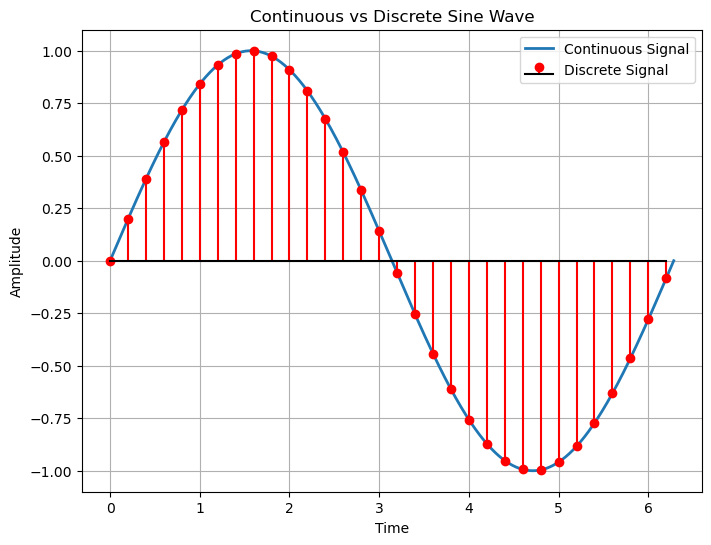

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a continuous sine wave
t_continuous = np.linspace(0, 2 * np.pi, 1000)  # Time array for 'continuous' signal
y_continuous = np.sin(t_continuous)

# Generate a discrete sine wave
t_discrete = np.arange(0, 2 * np.pi, 0.2)  # Time array for discrete signal
y_discrete = np.sin(t_discrete)

# Plot the continuous signal
plt.figure(figsize=(8, 6))
plt.plot(t_continuous, y_continuous, label='Continuous Signal', linewidth=2)

# Plot the discrete signal
plt.stem(t_discrete, y_discrete, linefmt='r-', markerfmt='ro', basefmt='k-', label='Discrete Signal')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Continuous vs Discrete Sine Wave')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### 1.2 Sampling & Quantization <a id="subsection-1.2"></a>
As a music producer, you will often be concerned about turning real continuous signals like the signal that represents the sound generated by a singer who is recording vocals beside you, into discrete signals that can be played back by your computer. In order to pass from the domain of the real (i.e your voice, a guitar, an analog synthesizer) to the domain of the digital (a recording in your computer), we need to do something called _sampling_.

Sampling the process of converting a continuous signal into a discrete one. Actually, if you look at the graph above, it is a pretty good representation of what sampling looks like. We have a continuous sine wave in blue, which we represent discretely by _sampling_ the values of the original signal at regular intervals (in the above, every 0.2s). This process gives us the red sine wave, a discrete approximation of the original sine wave. The number of samples we decide to take per second is called the _sampling rate_ which is measured in hertz. The most common sampling rate is 44.1kHz.

Clearly though, if you sample the original signal infrequently, you will not end up with a good representation of the original signal. The _sampling theorem_ tells us that if we have some source signal with frequency $\text{f}_s$, we must pick a sampling rate of at least $\text{f}_{sr} \geq 2\text{f}_s$ to not lose any information in the sampling process. If the sampling rate is too low and does not obey the sampling theorem, we observe a phenomenon called _aliasing_. See below for an example of aliasing. The blue sine wave is constructed based on the samples taken from the analog signal, but due to the low sampling rate, the sampled signal has a much lower frequency than the original analog signal.

![Aliasing](https://kistler.cdn.celum.cloud/SAPCommerce_CMSGalleryStandard_720x480/kistler_aliasing-effect_21952-774x5158.png)

Another problem that arises due to the discrete nature of digital audio is the question of _quantization_. When sampling from an analog signal, one must also consider the fact that computers cannot represent the values that we are sampling to an arbitrary degree of precision. Computers have a limited amount of memory, and one needs to be prudent about its allocation. Each extra degree of precision is another bit to add to the binary representation of our value in computer memory. Therefore each sample must be quantized. The _bit depth_ is typically used to specify the degree of quantization. You may have heard of 16 bit audio, or 24 bit or even 32 bit audio. 16 bit audio means that the dynamic range, the difference between the softest and loudest amplitudes that the computer can represent, will be quantized into $2^{16} = 65536$ discrete amplitude levels, and so on for 24 or 32 bit audio. The quantization is directly related to the perceived fidelity of the sound.

From all this we can directly determine how much memory our digital signal will represent:

$$ \text{File Size (Bytes)} = \text{Bit Depth}/8 \times \text{No. of Channels} \times \text{Sampling Rate} \times \text{Duration in Seconds} $$

Signals can of course have several "channels". Audio signals typically are either stereo (2 channels, a left and a right channel) or mono (1 channel only). This is what we mean by channels above.

### 1.3 Time & Frequency Domain Representation of Signals <a id="subsection-1.3"></a>
#### 1.3.1 Fourier Series
Until now, we have only discussed signals being a function of time. However, there is a lot of information about a signal that is not readily available to us simply by looking at the signal as a function of time. It will prove useful to us to look at the signal in the frequency domain. It turns out, that in much the same way that a simple vector can be considered a linear combination of some "basis" vectors in the x and y direction (usually called $\hat{i}$ and $\hat{j}$), many functions can also be considered a linear combination of some basis functions, notably of $sin$ and $cos$ functions of various frequencies. This is called the _Fourier Series_, but its use is limited to _periodic_ signals. For some periodic signal, the Fourier Series tells us which periodic basis functions are present in the signal, their frequencies and their intensities. The Fourier Series is defined as the following sum:

$$ f(x) = a_0 + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi nx}{T}\right) + b_n \sin\left(\frac{2\pi nx}{T}\right) \right) $$

The Fourier coefficients are calculated as follows:

$$ a_0 = \frac{1}{T} \int_{0}^{T} f(x) \,dx $$

$$ a_n = \frac{2}{T} \int_{0}^{T} f(x) \cos\left(\frac{2\pi nx}{T}\right) \,dx $$

$$ b_n = \frac{2}{T} \int_{0}^{T} f(x) \sin\left(\frac{2\pi nx}{T}\right) \,dx $$

**Note**: there is also a "complex" version of the Fourier series which consists of a sum of complex exponentials. It can often facilitate our calculations, if we agree to take the real part at the end. 

For example, our dearly beloved square wave has a Fourier Series consisting only of odd harmonics (i.e where the $n$ in the series above is an odd number). Below we plot the first 1, 10, 50 and 100 terms in the Fourier Series of a square wave. We see that as we include higher order harmonics, the signal starts to resemble the square wave more and more. 

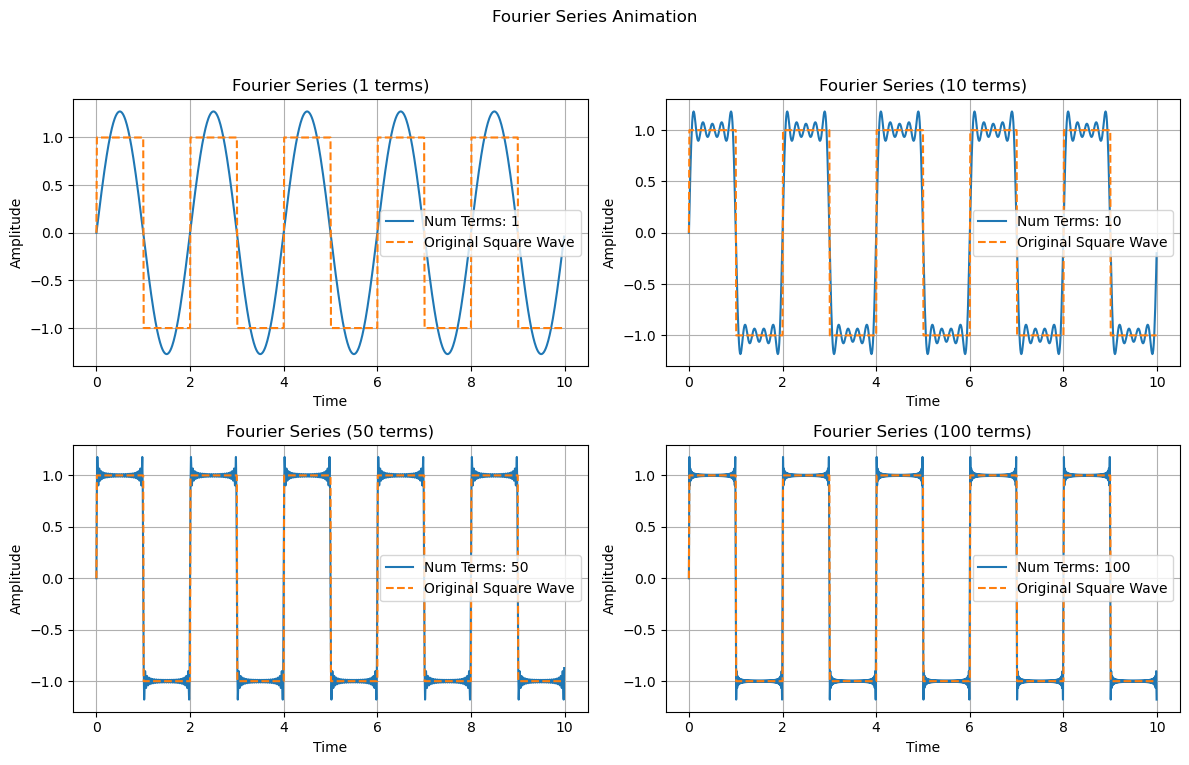

In [27]:
# Use inline backend for static plots
%matplotlib inline

def square_wave_fourier_series(t, A, T, num_terms):
    result = np.zeros_like(t)
    for n in range(1, num_terms + 1, 2):
        result += (4 * A / (np.pi * n)) * np.sin(2 * np.pi * n * t / T)
    return result

# Parameters for the square wave
A = 1        # Amplitude
T = 2        # Period
num_terms_list = [1, 10, 50, 100]

# Generate time values
t = np.linspace(0, 5 * T, 1000, endpoint=False)

# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Fourier Series Animation')

# Plot each subplot
for i, num_terms in enumerate(num_terms_list):
    ax = axs[i // 2, i % 2]
    ax.plot(t, square_wave_fourier_series(t, A, T, num_terms), label=f'Num Terms: {num_terms}')
    ax.plot(t, np.sign(np.sin(2 * np.pi * t / T)) * A, label='Original Square Wave', linestyle='--')
    ax.legend()
    ax.set_title(f'Fourier Series ({num_terms} terms)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.grid(True)

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

We could make a "frequency domain" plot from our Fourier series by plotting the frequencies of each term and their amplitudes, and this would give us a simple spectrum. If you have ever played a square wave in a spectrum analyzer, that will look familiar to you.


#### 1.3.2 Fourier Transform
There is an important generalization of the Fourier Series to _aperiodic_ signals which is called the _Fourier Transform_ (FT). This integral transform maps a function in the time domain $f(t)$ to a frequency spectrum $F(\omega)$ in the frequency domain. As most signals we are interested in are not periodic, we will typically be concerned more with the FT. 

If we look at the plots below, we will see that there are 2 signals in the time domain on the left - a simple sine wave and then a noisier brown noise signal. On the right, we have their corresponding Fourier Transforms. As expected, the Fourier Transform of the sine wave contains one harmonic at the frequency of the sine wave, whereas the brown noise signal consists of many more upper harmonics whose intensities decay rapidly as the frequency increases.

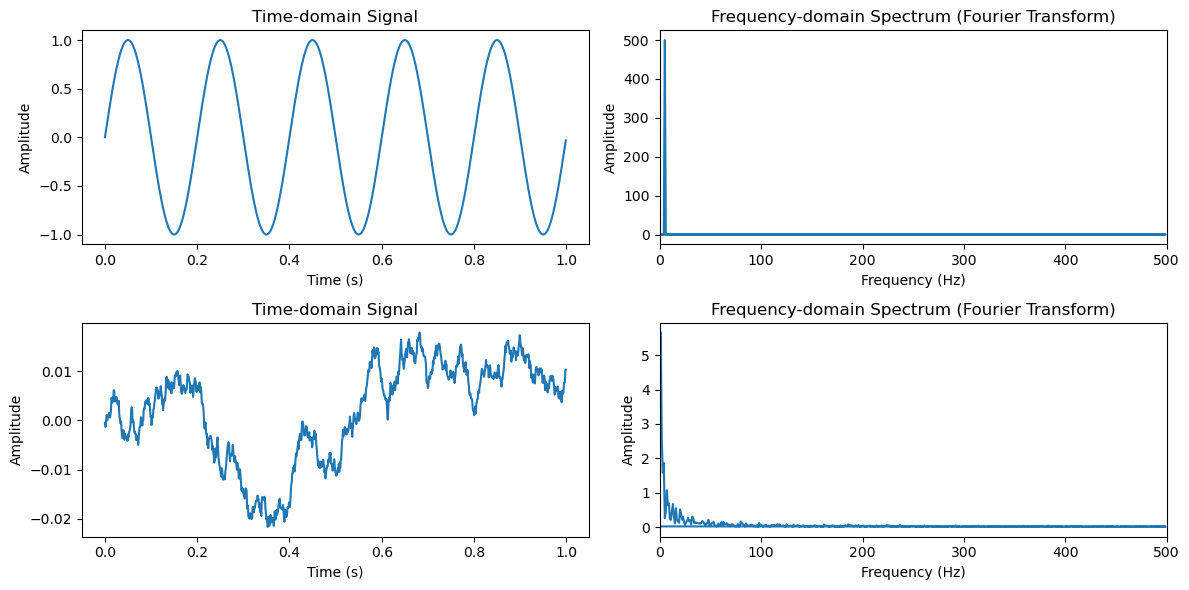

In [28]:
def generate_sine_wave(frequency, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)
    return t, signal

def generate_brown_noise(duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    signal = np.cumsum(np.random.normal(0, 1/sampling_rate, len(t)))
    return t, signal

def plot_signal_and_spectrum(ax, t, signal, sampling_rate):
    # Perform Fourier transform
    fft_result = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(len(fft_result), 1/sampling_rate)

    # Plot the time-domain signal
    ax[0].plot(t, signal)
    ax[0].set_title('Time-domain Signal')
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Amplitude')

    # Plot the frequency-domain spectrum
    ax[1].plot(fft_freq, np.abs(fft_result))
    ax[1].set_title('Frequency-domain Spectrum (Fourier Transform)')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_xlim(0, sampling_rate/2)  # Display only positive frequencies

# Define the parameters
frequency = 5  # Frequency of the sine wave in Hz
duration = 1    # Duration of the signal in seconds
sampling_rate = 1000  # Sampling rate in Hz

# Generate and plot the first signal (sine wave) and its spectrum
t1, signal1 = generate_sine_wave(frequency, duration, sampling_rate)

# Generate and plot the second signal (brown noise) and its spectrum
t2, signal2 = generate_brown_noise(duration, sampling_rate)

# Create a (2, 2) subplot layout
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

# Plot the first signal and its spectrum
plot_signal_and_spectrum(ax[0], t1, signal1, sampling_rate)

# Plot the second signal and its spectrum
plot_signal_and_spectrum(ax[1], t2, signal2, sampling_rate)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


Conversely, if the frequency response of a signal is known - one can use the Inverse Fourier Transform to recover the time domain representation of the signal.

It turns out these transforms are useful in filter design, since the frequency response of a filter can be obtained by taking the Fourier transform of its impulse response. We will see more of that later.

#### 1.3.3 Discrete Fourier Transform

#### 1.3.4 Fast Fourier Transform Algorithm